###  A high-end retailer with several location looks to find high-value customers—those who are anticipated to bring in a lot of money for the retailer—and develops a unique marketing plan just for them in order to maximize their marketing efforts. As an analyst you are using data from previous year's purchases, a predictive model may be used to forecast a customer's revenue for the upcoming year. Naturally, a customer with more projected revenue is one of higher value.

### You intend to develop a model to forecast the customer's revenue in 2020 based on the purchases they made in 2019 in order to validate this strategy. The method is validated if the model operates correctly. The business can then identify high-value clients and forecast customer revenue for 2021 using the 2020 purchase data.

### From the given dataset, create new variables like revenue for 2019, number of days since first and last purchase, number of purchases made by the customer, average order cost, and 2020 revenue.

In [1]:
import pandas as pd
import datetime as dt

In [4]:
Retailer_data = pd.read_csv('data/Retail_transactions.csv')
Retailer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


In [5]:
Retailer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


In [6]:
# Convert the InvoiceDate column to date format
Retailer_data['InvoiceDate'] = pd.to_datetime(Retailer_data['InvoiceDate'])
Retailer_data['InvoiceDate']

0        2020-03-16 11:36:00
1        2020-07-13 12:18:00
2        2020-04-01 13:20:00
3        2020-01-09 15:23:00
4        2020-07-27 09:52:00
                 ...        
397879   2020-09-20 10:06:00
397880   2020-03-29 13:06:00
397881   2019-12-01 09:41:00
397882   2020-06-19 10:35:00
397883   2020-07-01 13:04:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [7]:
# Calculate the Revenue
Retailer_data['Revenue'] =Retailer_data['UnitPrice'] * Retailer_data['Quantity']

In [8]:
Retailer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [9]:
# Use groupby to get the sum of the revenue, invoice first date, first customer ID
operations = {'Revenue' : 'sum', 'InvoiceDate' : 'first', 'CustomerID' : 'first'}

Retailer_data = Retailer_data.groupby(['InvoiceNo']).agg(operations)
Retailer_data

,Revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0
...,...,...,...
581583,124.60,2020-12-09 12:23:00,13777.0
581584,140.64,2020-12-09 12:25:00,13777.0
581585,329.05,2020-12-09 12:31:00,15804.0


In [10]:
# Get the year from the invoice date
Retailer_data['year'] = Retailer_data['InvoiceDate'].dt.year

In [11]:
dt.datetime(2019,12,31)

datetime.datetime(2019, 12, 31, 0, 0)

In [12]:
# Finding the days_since last purchase by subracting from the end of the 2019 year
Retailer_data['days_since'] = (dt.datetime(year = 2019, month = 12, day = 31) - Retailer_data['InvoiceDate']).apply(lambda x : x.days)

In [59]:
# creating the features for days since the first and last purchase, along with the number of purchases and total revenue for 2019 with the use of groupby function. 
# 2019 is predictor variable
operations = {'Revenue' : 'sum', 'days_since' : ['max', 'min', 'nunique']}

X = Retailer_data[Retailer_data['year'] == 2019].groupby('CustomerID').agg(operations)

X.head()

Revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [19]:
X.columns

MultiIndex([(   'Revenue',     'sum'),
            ('days_since',     'max'),
            ('days_since',     'min'),
            ('days_since', 'nunique')],
           )

In [60]:
# Reseting the column names for the easier understanding of the data
X.columns = [' '.join(col).strip() for col in X.columns.values]

X.head()

,Revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [21]:
# Calculae the average order cost
X['avg_order_cost'] = X['Revenue sum'] / X['days_since nunique']

In [25]:
# creating the features for total revenue for 2020 with the use of groupby function which is an outcome variable
y = Retailer_data[Retailer_data['year'] == 2020].groupby('CustomerID')['Revenue'].sum()

y.head()

CustomerID
12346.0    77183.60
12347.0     3598.21
12348.0      904.44
12349.0     1757.55
12350.0      334.40
Name: Revenue, dtype: float64

In [26]:
# merge the predictor and outcome variable
df = pd.concat([X,y], axis = 1)
df.head()

,Revenue sum,days_since max,days_since min,days_since nunique,avg_order_cost,Revenue
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [28]:
# Rename the column names
df.columns = ['revenue_2019','days_since_first_purchase','days_since_last_purchase','number_of_purchases','avg_order_cost','revenue_2020']
df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [29]:
# Check for null values
df.isnull().sum()

revenue_2019                 3453
days_since_first_purchase    3453
days_since_last_purchase     3453
number_of_purchases          3453
avg_order_cost               3453
revenue_2020                  119
dtype: int64

In [30]:
df[~df.revenue_2019.isnull()]

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84
...,...,...,...,...,...,...
18239.0,438.10,28.0,28.0,1.0,438.10,1123.51
18245.0,365.73,11.0,11.0,1.0,365.73,2201.33
18259.0,376.30,22.0,22.0,1.0,376.30,1962.30


In [31]:
df[~df.revenue_2020.isnull()]

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40
...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,180.60
18281.0,NaN,NaN,NaN,NaN,NaN,80.82
18282.0,NaN,NaN,NaN,NaN,NaN,178.05


In [32]:
df = df[~df.revenue_2019.isnull()]
df = df[~df.revenue_2020.isnull()]

In [34]:
df.isnull().sum()

revenue_2019                 0
days_since_first_purchase    0
days_since_last_purchase     0
number_of_purchases          0
avg_order_cost               0
revenue_2020                 0
dtype: int64

In [35]:
# Remove the outlier
df = df[df.revenue_2020 < ((df.revenue_2020.median()) + df.revenue_2020.std()*3)]
df = df[df.revenue_2019 < ((df.revenue_2019.median()) + df.revenue_2019.std()*3)]

In [36]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt

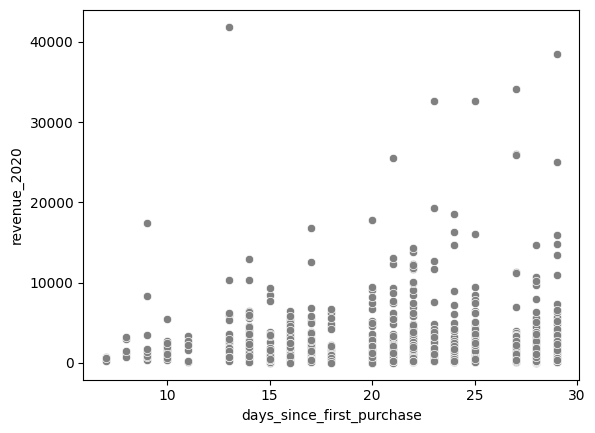

In [38]:
sns.scatterplot(data=df, x = "days_since_first_purchase", y = "revenue_2020", color = "gray");

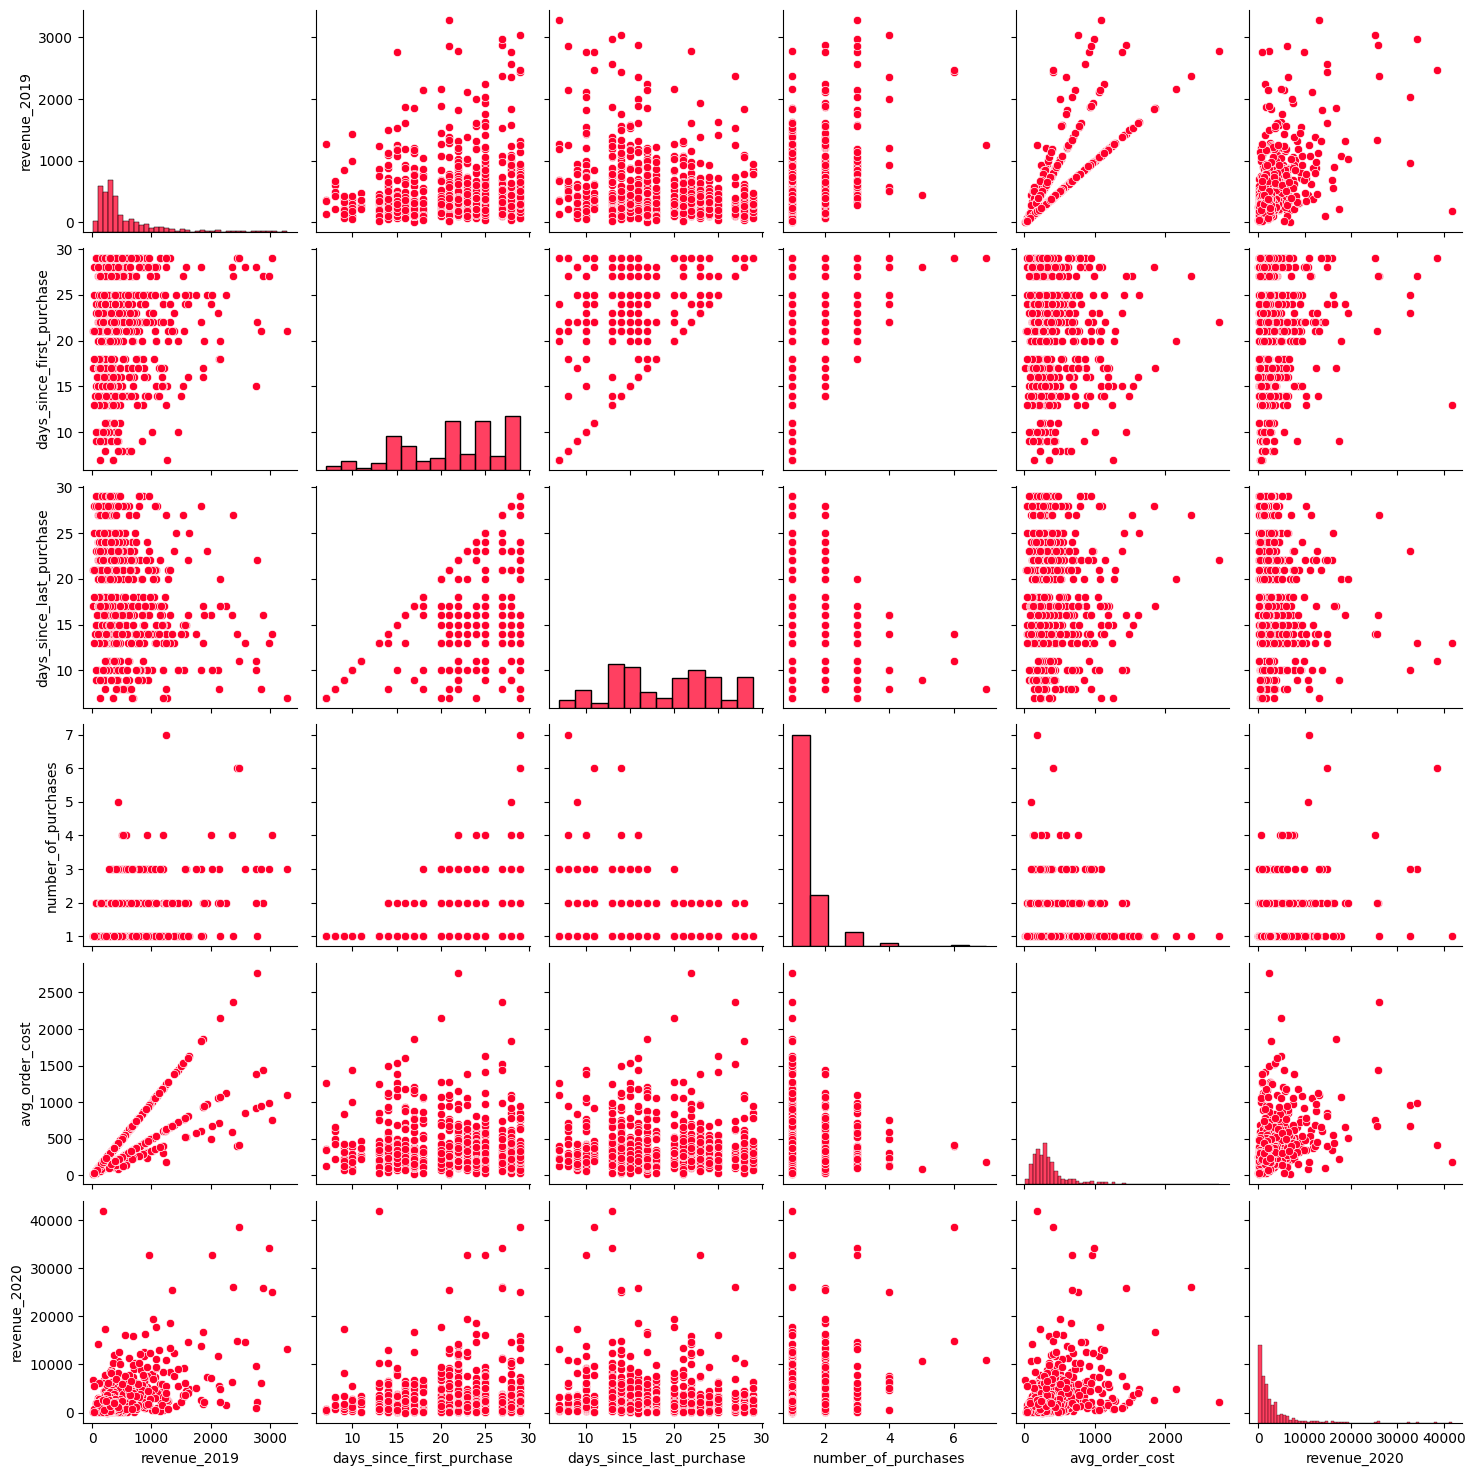

In [61]:
# Visualize the data to see if any there is any correlation
sns.set_palette('prism_r')
sns.pairplot(df);

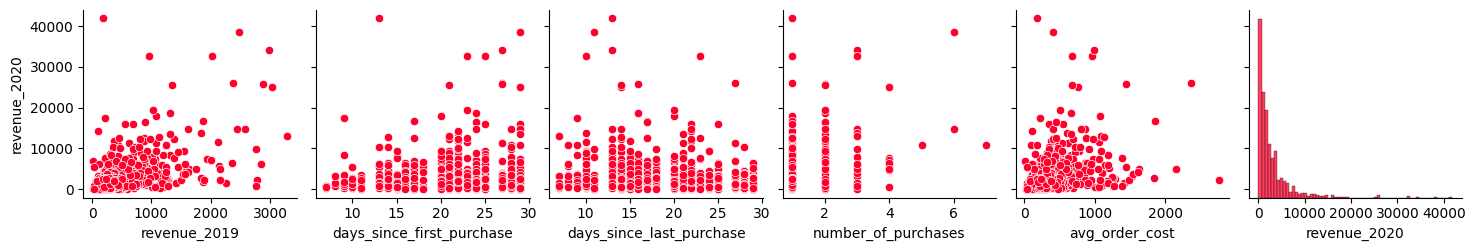

In [62]:
sns.pairplot(df, x_vars = df.columns, y_vars = 'revenue_2020');

In [41]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [42]:
# Create the independent and dependent 
X = df.drop(labels=['days_since_first_purchase', 'revenue_2020'], axis=1)
y = df['revenue_2020']

In [43]:
X.head()

,revenue_2019,days_since_last_purchase,number_of_purchases,avg_order_cost
CustomerID,,,,
12347.0,711.79,23.0,1.0,711.79
12348.0,892.80,14.0,1.0,892.80
12370.0,1868.02,13.0,2.0,934.01
12377.0,1001.52,10.0,1.0,1001.52
12383.0,600.72,8.0,1.0,600.72


In [44]:
y.head()

CustomerID
12347.0    3598.21
12348.0     904.44
12370.0    1677.67
12377.0     626.60
12383.0    1249.84
Name: revenue_2020, dtype: float64

In [45]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [46]:
# Import the Linear Regression Model
from sklearn.linear_model import LinearRegression

In [47]:
# Fit the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Find the coefficient
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [49]:
# Find the intercept
model.intercept_

264.8693265705974

In [50]:
# Making predictions about a customer who is not in your dataset using the fitted model. 
# Creating a DataFrame with the following information for a single customer: income for 2019 is $1,400; 
# days since last buy is 40, number of purchases is 5, and average order cost is 700.
single_customer = pd.DataFrame({'revenue_2019': [1400],'days_since_last_purchase': [40],'number_of_purchases': [5],'avg_order_cost': [700]})
single_customer

,revenue_2019,days_since_last_purchase,number_of_purchases,avg_order_cost
0,1400,40,5,700


In [51]:
# Predicting the Revenue
model.predict(single_customer)

array([8911.06445407])

In [58]:
%matplotlib inline

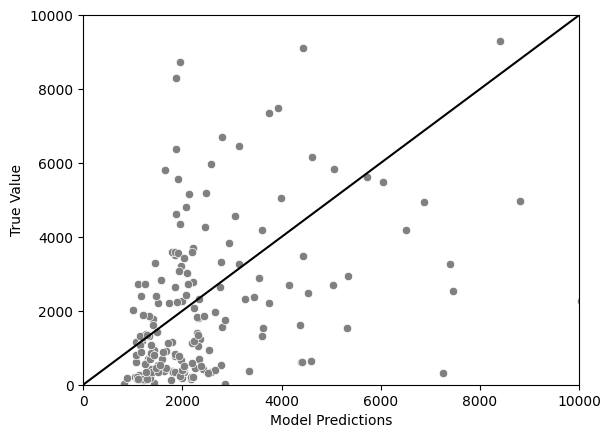

In [52]:
# Checking if there is any relationship between predictions and answer
sns.scatterplot(data=None, x = model.predict(X_test), y = y_test, color = 'gray')
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

In [53]:
import numpy as np

In [54]:
# Finding the correlation between predicted and actual value
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])

In [ ]:
# Correlation has been obsevered 0.61 between the predicted and actual value. Hence there is an faily strong relationship.